In [1]:
!pip install feedparser
!pip install beautifulsoup4
!pip install janome

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6049 sha256=27f2f4284f421ca0161fef1e0ec70bc9b20eb3ea3da51425ca128ac39f4468e3
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 41.5 MB/s eta 0:00:00


In [2]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 1s (5,539 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 123586 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipa

In [3]:
from google.colab import drive
import xml.etree.ElementTree as ET
from bs4 import BeautifulSoup
import feedparser
from sklearn.feature_extraction.text import TfidfVectorizer
from janome.tokenizer import Tokenizer
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
#WordCloudで日本語を表示するためフォントを指定
FONT_PATH = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'

In [6]:
def get_word_str(text):
  #形態素解析
  t = Tokenizer()
  token = t.tokenize(text)
  word_list = []
  for line in token:
      tmp = re.split('\t|,', str(line))
      # 名詞のみ対象
      if tmp[1] in ["名詞"]:
          # 一般,固有名詞のみ対象
          if tmp[2] in ["一般", "固有名詞"]:
              word_list.append(tmp[0])

  return " " . join(word_list)

In [7]:
# OPMLファイルを読み込む
tree = ET.parse('/content/gdrive/MyDrive/GenreGetter-JP/feedly_sample.opml')
root = tree.getroot()

word_str = ""

In [8]:
for outline in root.findall('body/outline/outline'):
  # RSSフィードのURLを取得
  RSS_URL = outline.get('xmlUrl')

  if RSS_URL:
    # RSSフィードのパース
    d = feedparser.parse(RSS_URL)
    for item in d.entries:
      if hasattr(item, 'description')or hasattr(item, 'content'):
        # HTMLタグの除去
        soup = BeautifulSoup(item.description, 'html.parser')
        text = soup.get_text()
        # 特殊文字や記号の除去
        text = re.sub(r'[^\w\s]', '', text)
        # 名詞の抽出
        word_str += " " + get_word_str(text)

<ipython-input-8-c33dabfbb3b2>:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(item.description, 'html.parser')


In [19]:
#WordCloudを作成
wc = WordCloud(font_path=FONT_PATH).generate(word_str)

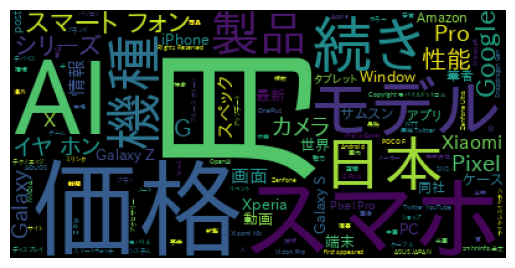

In [22]:
#wcを表示後、フォルダ内に保存
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('/content/gdrive/MyDrive/GenreGetter-JP/wc.png')